In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

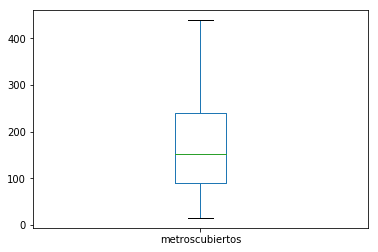

In [4]:
df.metroscubiertos.plot(kind = 'box')

In [5]:
df['precio_del_metro_cuadrado'] = df.precio / df.metrostotales

In [6]:
df.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [7]:
df\
.loc[:,['provincia','precio_del_metro_cuadrado']]\
.groupby('provincia')\
.mean()\
.sort_values('precio_del_metro_cuadrado',ascending = False)

,precio_del_metro_cuadrado
provincia,
Distrito Federal,24011.411266
Guerrero,14678.291470
Edo. de México,14146.115299
Jalisco,13570.913738
Tabasco,13366.246230
Nuevo León,13197.894574
Puebla,12935.559997
Quintana Roo,12673.585135
Chiapas,11020.039292


In [8]:
### analisis aparte... por distrito y año para ver la inflacion promedio de estos.

In [9]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha'].dt.month.value_counts()

12    42227
10    23306
11    21225
8     20897
9     20622
7     17510
6     17221
4     16466
5     16062
1     16009
3     14732
2     13723
Name: fecha, dtype: int64

In [10]:
trimester = {
    1:'primer',
    2:'primer',
    3:'primer',
    4:'segundo',
    5:'segundo',
    6:'segundo',
    7:'tercer',
    8:'tercer',
    9:'tercer',
    10:'cuarto',
    11:'cuarto',
    12:'cuarto'
}


In [11]:
df['anio'] = df.fecha.dt.year
df = df.assign(trimestre=df['fecha'].dt.month.map(trimester))
df['trimestre'] = pd.Categorical(df['trimestre'], ["primer", "segundo", "tercer","cuarto"])
df.trimestre.value_counts()

cuarto     86758
tercer     59029
segundo    49749
primer     44464
Name: trimestre, dtype: int64

In [12]:
dfOption = df.loc[:,['anio','trimestre','provincia','precio']]
dfOption.dropna()


,anio,trimestre,provincia,precio
0,2015,tercer,Distrito Federal,2273000.0
1,2013,segundo,Distrito Federal,3600000.0
2,2015,cuarto,Jalisco,1200000.0
3,2012,primer,Edo. de México,650000.0
4,2016,segundo,Jalisco,1150000.0
5,2014,primer,Distrito Federal,1100000.0
6,2016,primer,Oaxaca,1150000.0
7,2016,cuarto,Quintana Roo,4200000.0
8,2014,primer,Colima,310000.0
9,2016,cuarto,Edo. de México,6200000.0


In [13]:
dfMean = df.groupby(['anio','trimestre','provincia'])['precio'].agg(['mean'])#.unstack(1).pct_change(axis='columns')
dfMean = dfMean.unstack(2).T.dropna().pct_change(axis='columns')
dfMean

anio                         2012                                    2013  \
trimestre                  primer   segundo    tercer    cuarto    primer   
     provincia                                                              
mean Aguascalientes           NaN  0.202676 -0.051461  0.030913 -0.161600   
     Baja California Norte    NaN -0.036862  0.129704  0.029605 -0.112863   
     Baja California Sur      NaN  0.521995  0.337460 -0.211945 -0.236033   
     Campeche                 NaN  0.458730 -0.163706  0.208650 -0.148549   
     Chiapas                  NaN  0.313560  0.062380 -0.034676  0.454785   
     Chihuahua                NaN -0.153385 -0.152613  0.431167 -0.155739   
     Coahuila                 NaN -0.025808  0.130575 -0.126390 -0.000538   
     Colima                   NaN -0.036496  0.298193 -0.263856  0.330246   
     Distrito Federal         NaN  0.072881  0.034326 -0.063364  0.031709   
     Durango                  NaN -0.025582  0.400994  0.065033 -0.149883   
     Edo. de México           NaN  0.012624  0.007574  0.091795  0.052221   
     Guanajuato               NaN  0.306822 -0.111726  1.068104 -0.531247   
     Guerrero                 NaN  0.227827 -0.191249  0.696701  0.104937   
     Hidalgo                  NaN  0.319319 -0.193009  0.045673  0.075733   
     Jalisco                  NaN -0.164899  0.268518 -0.143174  0.094383   
     Michoacán                NaN  0.091347  0.360580 -0.291168  0.288227   
     Morelos                  NaN -0.106235  0.132049  0.190027  0.014007   
     Nayarit                  NaN  0.237520 -0.129537 -0.067933  0.133042   
     Nuevo León               NaN  0.051691  0.255440  0.191184 -0.198976   
     Oaxaca                   NaN -0.294242  0.049641 -0.107471  0.246566   
     Puebla                   NaN -0.000550 -0.076168  0.033288  0.048988   
     Querétaro                NaN -0.030849  0.200343  0.057674 -0.144341   
     Quintana Roo             NaN  0.029340 -0.015662  0.208518  0.008892   
     San luis Potosí          NaN -0.027246  0.266179  0.104564 -0.068017   
     Sinaloa                  NaN  0.123645 -0.126467  0.202504  0.093952   
     Sonora                   NaN  0.081984  0.519651 -0.238975  0.116700   
     Tabasco                  NaN  0.327494 -0.057378 -0.161568  0.170005   
     Tamaulipas               NaN  0.092606  1.029306 -0.102883  0.211964   
     Tlaxcala                 NaN -0.468805  0.249045 -0.226726 -0.030753   
     Veracruz                 NaN -0.105129  0.083857  0.248642 -0.079889   
     Yucatán                  NaN  0.409635 -0.040740  0.116418  0.053763   

anio                                                          2014            \
trimestre                    segundo    tercer    cuarto    primer   segundo   
     provincia                                                                 
mean Aguascalientes         0.188342  0.050956 -0.039258 -0.018037 -0.190986   
     Baja California Norte -0.139197  0.161083 -0.015490 -0.110286  0.012192   
     Baja California Sur    0.111686 -0.038537  0.246099  0.001774 -0.128603   
     Campeche              -0.065152 -0.270665  0.317534 -0.192431  1.253551   
     Chiapas               -0.399372  0.159856  0.142619 -0.192079  0.184441   
     Chihuahua             -0.099644  0.284837 -0.022257  0.292545 -0.002703   
     Coahuila               0.122519  0.016274  0.091986 -0.010626  0.000063   
     Colima                -0.176435  0.042511 -0.181947 -0.208237  0.749422   
     Distrito Federal       0.033219  0.020115  0.031448 -0.002591  0.023493   
     Durango                0.213808 -0.019013 -0.204798  0.073550  0.140283   
     Edo. de México         0.013894  0.076610 -0.043116  0.002780  0.020103   
     Guanajuato             0.402033 -0.187699  0.000197  0.034512 -0.095847   
     Guerrero              -0.256706 -0.115398  0.129392  0.018530  0.289333   
     Hidalgo               -0.013700 -0.134947  0.314456 -0.250614  0.243840   
     Jalisco         

In [14]:
dfMeanWithYear = df.groupby(['anio','provincia'])['precio'].agg(['mean'])#.pct_change(axis='columns')
dfMeanWithYearPct = dfMeanWithYear.unstack(1).T.pct_change(axis = 'columns')
dfMeanWithYearPct

anio                        2012      2013      2014      2015      2016
     provincia                                                          
mean Aguascalientes          NaN  0.016540 -0.033976  0.069417  0.199496
     Baja California Norte   NaN -0.102850 -0.164315  0.214924 -0.023359
     Baja California Sur     NaN -0.214878  0.230447  0.215362 -0.044135
     Campeche                NaN -0.149201  0.601186  0.051353  0.027568
     Chiapas                 NaN  0.196062 -0.062989  0.031520  0.091467
     Chihuahua               NaN  0.081819  0.407139 -0.039462  0.023372
     Coahuila                NaN  0.074497  0.047848  0.032961  0.139408
     Colima                  NaN -0.064776  0.064370  0.435804  0.083160
     Distrito Federal        NaN  0.059126  0.064051  0.140070  0.039936
     Durango                 NaN  0.051725  0.025863  0.139862  0.077979
     Edo. de México          NaN  0.180767  0.034866  0.196240  0.047710
     Guanajuato              NaN -0.149688  0.293129 -0.088275  0.052393
     Guerrero                NaN  0.118955  0.137606  0.002693  0.226423
     Hidalgo                 NaN  0.046129  0.018133  0.193950  0.086078
     Jalisco                 NaN  0.016980  0.335969 -0.036515  0.132933
     Michoacán               NaN -0.000341 -0.111498 -0.047346  0.215495
     Morelos                 NaN  0.062043  0.164451  0.006437  0.119877
     Nayarit                 NaN  0.070261 -0.010169 -0.056607  0.112805
     Nuevo León              NaN  0.133090  0.021753  0.204298  0.210687
     Oaxaca                  NaN  0.129114  0.089648  0.030912  0.118134
     Puebla                  NaN  0.309781  0.172836  0.111754 -0.014328
     Querétaro               NaN -0.028194  0.023395  0.145856  0.137206
     Quintana Roo            NaN  0.131935  0.035953  0.166610  0.076560
     San luis Potosí         NaN -0.041068  0.096573  0.149572  0.101692
     Sinaloa                 NaN  0.006416 -0.070612 -0.072455  0.126181
     Sonora                  NaN  0.068384  0.097982  0.171883  0.110819
     Tabasco                 NaN  0.008863  0.056150  0.104502  0.053718
     Tamaulipas              NaN  0.115593 -0.168632 -0.077820  0.303666
     Tlaxcala                NaN -0.072782  0.023336  0.453668 -0.167689
     Veracruz                NaN  0.072948  0.091396  0.071400  0.043996
     Yucatán                 NaN  0.030149  0.031177  0.034592 -0.038608
     Zacatecas               NaN  0.026446 -0.060270 -0.515440  0.595364

In [15]:
dfMeanWithInflation = dfMeanWithYearPct.loc[(
            dfMeanWithYearPct[2013] > 0) & 
           (dfMeanWithYearPct[2014] > 0) &
           (dfMeanWithYearPct[2015] > 0) &
           (dfMeanWithYearPct[2016] > 0)
          ]
dfMeanWithInflation

anio                   2012      2013      2014      2015      2016
     provincia                                                     
mean Coahuila           NaN  0.074497  0.047848  0.032961  0.139408
     Distrito Federal   NaN  0.059126  0.064051  0.140070  0.039936
     Durango            NaN  0.051725  0.025863  0.139862  0.077979
     Edo. de México     NaN  0.180767  0.034866  0.196240  0.047710
     Guerrero           NaN  0.118955  0.137606  0.002693  0.226423
     Hidalgo            NaN  0.046129  0.018133  0.193950  0.086078
     Morelos            NaN  0.062043  0.164451  0.006437  0.119877
     Nuevo León         NaN  0.133090  0.021753  0.204298  0.210687
     Oaxaca             NaN  0.129114  0.089648  0.030912  0.118134
     Quintana Roo       NaN  0.131935  0.035953  0.166610  0.076560
     Sonora             NaN  0.068384  0.097982  0.171883  0.110819
     Tabasco            NaN  0.008863  0.056150  0.104502  0.053718
     Veracruz           NaN  0.072948  0.091396  0.071400  0.043996

In [16]:
#dfMeanWithInflation.columns = dfMeanWithInflation.columns.droplevel(0)

In [17]:
provConInflacion = list(dfMeanWithInflation.reset_index().drop(['level_0'], axis=1)['provincia'])

In [18]:
dfMean = dfMean.rename(columns=str).reset_index().drop(['level_0'],axis = 1)

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [19]:
dfMean = dfMean[dfMean['provincia'].isin(provConInflacion)]
dfMean

anio              provincia   2012                                    2013  \
trimestre                   primer   segundo    tercer    cuarto    primer   
6                  Coahuila    NaN -0.025808  0.130575 -0.126390 -0.000538   
8          Distrito Federal    NaN  0.072881  0.034326 -0.063364  0.031709   
9                   Durango    NaN -0.025582  0.400994  0.065033 -0.149883   
10           Edo. de México    NaN  0.012624  0.007574  0.091795  0.052221   
12                 Guerrero    NaN  0.227827 -0.191249  0.696701  0.104937   
13                  Hidalgo    NaN  0.319319 -0.193009  0.045673  0.075733   
16                  Morelos    NaN -0.106235  0.132049  0.190027  0.014007   
18               Nuevo León    NaN  0.051691  0.255440  0.191184 -0.198976   
19                   Oaxaca    NaN -0.294242  0.049641 -0.107471  0.246566   
22             Quintana Roo    NaN  0.029340 -0.015662  0.208518  0.008892   
25                   Sonora    NaN  0.081984  0.519651 -0.238975  0.116700   
26                  Tabasco    NaN  0.327494 -0.057378 -0.161568  0.170005   
29                 Veracruz    NaN -0.105129  0.083857  0.248642 -0.079889   

anio                                         2014    ...               \
trimestre   segundo    tercer    cuarto    primer    ...       tercer   
6          0.122519  0.016274  0.091986 -0.010626    ...    -0.077429   
8          0.033219  0.020115  0.031448 -0.002591    ...     0.015929   
9          0.213808 -0.019013 -0.204798  0.073550    ...    -0.153471   
10         0.013894  0.076610 -0.043116  0.002780    ...     0.032354   
12        -0.256706 -0.115398  0.129392  0.018530    ...    -0.098292   
13        -0.013700 -0.134947  0.314456 -0.250614    ...    -0.037735   
16        -0.175539  0.080642  0.018791  0.043766    ...     0.070894   
18         0.151512  0.116576 -0.013638  0.033404    ...    -0.037481   
19        -0.271532  0.535447  0.004613  0.028672    ...     0.422260   
22         0.145695 -0.161967  0.005832  0.128114    ...     0.110855   
25        -0.074421  0.022067  0.132223  0.007826    ...     0.071824   
26        -0.135376  0.205063 -0.062621 -0.020794    ...     0.454737   
29         0.016115 -0.045218 -0.045735  0.174580    ...     0.125035   

anio                     2015                                    2016  \
trimestre    cuarto    primer   segundo    tercer    cuarto    primer   
6          0.093737  0.084601 -0.137720 -0.019043  0.189315 -0.009716   
8          0.013833  0.031124  0.052358  0.063186  0.031013 -0.036942   
9          0.198416  0.166045 -0.055049 -0.118954  0.091942  0.132141   
10        -0.005796  0.048340  0.166391  0.040668 -0.071142  0.051171   
12         0.101681 -0.128951 -0.047817  0.279509 -0.025347 -0.041249   
13         0.187517 -0.162755  0.559896 -0.241153  0.109838 -0.096781   
16         0.071024 -0.095795 -0.009609  0.012077  0.093460 -0.039671   
18         0.119635 -0.005534  0.156154  0.072864 -0.043215  0.128686   
19        -0.483819  0.573203  0.095854 -0.354359  0.658301 -0.225745   
22         0.068957  0.059039  0.023916  0.112803 -0.099222  0.040782   
25         0.030824  0.191387 -0.208689  0.101034  0.320521 -0.138308   
26        -0.155001  0.015317 -0.000952 -0.494337  1.668694 -0.582220   
29        -0.050231  0.098191  0.038013 -0.077259  0.012713  0.013300   

anio                                     
trimestre   segundo    tercer    cuarto  
6         -0.037982  0.173924  0.001333  
8          0.011181  0.068898 -0.079969  
9         -0.102538  0.114206 -0.080705  
10         0.024830 -0.014697 -0.034986  
12         0.147065  0.120969 -0.088123  
13         0.156613 -0.027342 -0.000029  
16         0.184312 -0.144650  0.060166  
18        -0.079806  0.367586 -0.187340  
19        -0.040024  0.298826  0.296388  
22         0.118713 -0.074870  0.039586  
25        -0.213866  0.342833  0.065497  
26         1.475959 -0.190718 -0.081424  
29         0.000361  0.061761  0.000366  

[13 ro

# Análisis sobre el m2 en las provincias donde hubo inflación interanual en crecimiento

### En este análisis se tienen encuenta aquellas provincias mexicanas que sólo tuvieron aumentos de manera constante en el precio promedio de sus m2 de manera interanual (2012-2016)

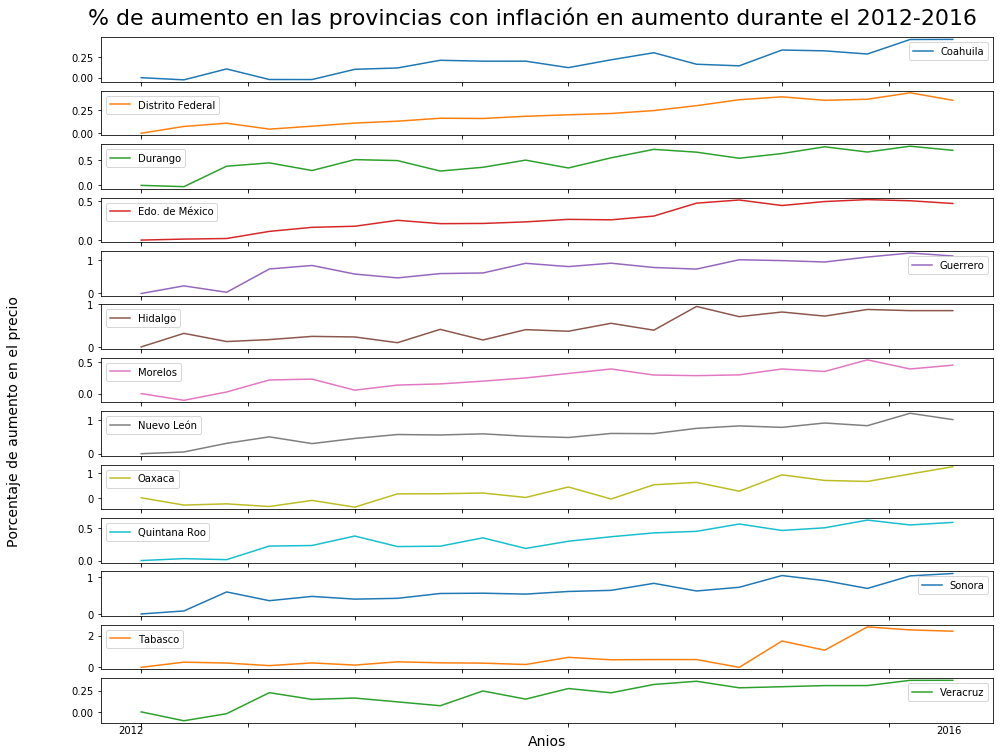

In [20]:
axes = dfMean.set_index('provincia').T.cumsum().fillna(0).plot(figsize = (16,14), subplots = True, layout = (13, 1))
axes[12,0].set_xlabel("Anios",fontsize = 14)
fig=axes[0,0].figure
fig.text(0.5,0.9, "% de aumento en las provincias con inflación en aumento durante el 2012-2016", ha="center", va="center",fontsize= 22)
#fig.text(0.5,0.14, "Trimestre - Año", ha="center", va="center",fontsize = 14)
fig.text(0.05,0.5, "Porcentaje de aumento en el precio", ha="center", va="center", rotation=90,fontsize = 14)
fig.text(0.14,0.19,"2012")
fig.text(0.85,0.19,"2016")


plt.show()


##### Estas son las únicas 13 provincias que tienen de manera inflación de manera en su precio promedio a lo largo de cada año.

In [59]:
colors = ['green','blue','red','black','gold','brown','orange','purple','pink','grey','olive','cyan','tan']

plotDf = dfMean.set_index('provincia').T.fillna(0).cumsum()#.plot(figsize = (16,14),color = colors)
plotDf = plotDf.set_index(plotDf.index.get_level_values(0)+'_'+ plotDf.index.get_level_values(1))
plotDf

provincia,Coahuila,Distrito Federal,Durango,Edo. de México,Guerrero,Hidalgo,Morelos,Nuevo León,Oaxaca,Quintana Roo,Sonora,Tabasco,Veracruz
2012_primer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012_segundo,-0.025808,0.072881,-0.025582,0.012624,0.227827,0.319319,-0.106235,0.051691,-0.294242,0.029340,0.081984,0.327494,-0.105129
2012_tercer,0.104767,0.107207,0.375412,0.020198,0.036579,0.126309,0.025814,0.307131,-0.244600,0.013678,0.601635,0.270116,-0.021273
2012_cuarto,-0.021623,0.043844,0.440444,0.111994,0.733280,0.171983,0.215841,0.498314,-0.352072,0.222196,0.362659,0.108549,0.227369
2013_primer,-0.022162,0.075553,0.290562,0.164215,0.838217,0.247715,0.229847,0.299338,-0.105506,0.231088,0.479360,0.278554,0.147480
2013_segundo,0.100357,0.108772,0.504370,0.178109,0.581511,0.234015,0.054308,0.450850,-0.377038,0.376784,0.404939,0.143178,0.163595
2013_tercer,0.116631,0.128887,0.485357,0.254719,0.466113,0.099068,0.134951,0.567426,0.158409,0.214817,0.427006,0.348241,0.118377
2013_cuarto,0.208617,0.160335,0.280559,0.211603,0.595506,0.413524,0.153741,0.553787,0.163022,0.220648,0.559229,0.285620,0.072642
2014_primer,0.197991,0.157744,0.354110,0.214383,0.614035,0.162910,0.197507,0.587191,0.191694,0.348762,0.567055,0.264827,0.247222
2014_segundo,0.198054,0.181237,0.494393,0.234486,0.903368,0.406750,0.248206,0.516426,0.012348,0.185785,0.542482,0.177651,0.151009


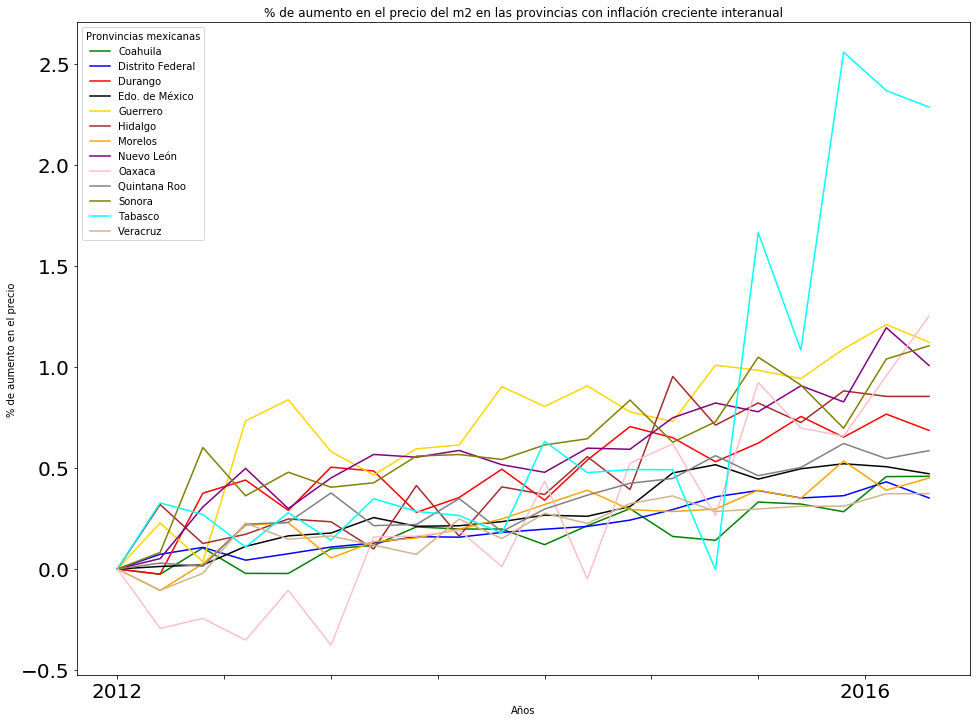

In [69]:
fig = plotDf.plot(figsize = (16,12),color = colors, title = "% de aumento en el precio del m2 en las provincias con inflación creciente interanual", fontsize = 20)
fig.set_ylabel("% de aumento en el precio",fontsize = 10)
fig.set_xlabel("Años",fontsize = 10)
fig.set_xticklabels(['','2012','','','','','','','2016'])
fig.legend(title = "Pronvincias mexicanas")

##### Para tener perspectiva, aća se ve como de manera muy clara el progresivo crecimiento en el valor promedio del m2 de las 13 provincias destacadas en este rúbro.
Tabasco es aquella provincia que muetra un crecimiento del 200% en el m2.
Por su parte, tanto el Distrito Federal como el Estado de México comparten un lógico crecimiento debido a la importancia de dichos lugares.